# Creating a Filter, Edge Detection

### Import resources and display image

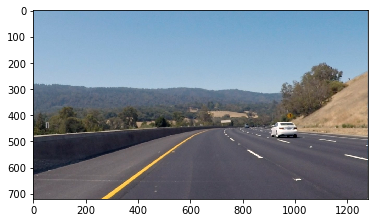

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

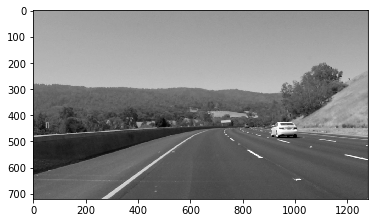

In [5]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="notebook_ims/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

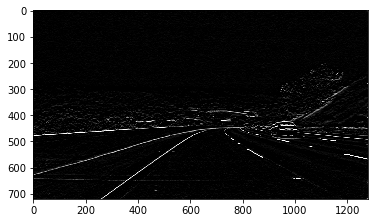

In [6]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

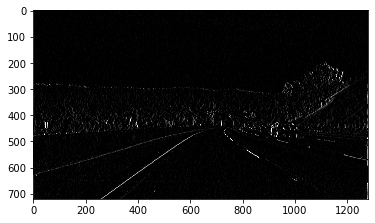

In [8]:
# Appy Sobel X operator
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

filtered_image_sobel_x = cv2.filter2D(gray, -1, sobel_x)
plt.imshow(filtered_image_sobel_x, cmap='gray')

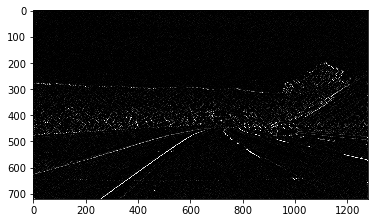

In [10]:
#Both Sobel X and Y
filtered_sobel_xy = cv2.filter2D(gray, -1, sobel_x)
filtered_sobel_xy = cv2.filter2D(filtered_sobel_xy, -1, sobel_y)
plt.imshow(filtered_sobel_xy, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



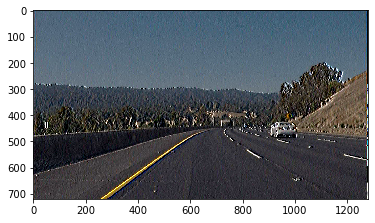

In [44]:
# Decimal filter
filter_dec = np.array([
    [-1.5, 0, 1.7],
    [-2.5, 0, 2.7],
    [-1.5, 0, 1.7]
])

#plt.imshow(image)
plt.imshow(cv2.filter2D(image, -1, filter_dec))

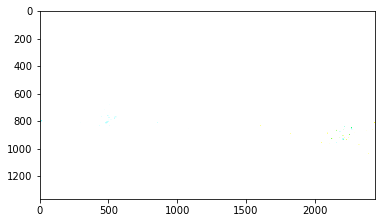

In [54]:
# 5X5 filter
filter_5by5= np.array([
    [1.2, 0, 1, 0, 3.4],
    [1.3, 0, 1, 0, 3.5],
    [1.4, 0, 1, 0, 3.6],
    [1.5, 0, 1, 0, 3.7],
    [1.6, 0, 1, 0, 3.8]
])

image = mpimg.imread('data/white_lines.jpg')
image = cv2.filter2D(image, -1, filter_5by5)
plt.imshow(image)


### Apply Sobel X & Y to other images

In [55]:
def sobel(img, filters='xy'):
#     import cv2
#     import numpy as np
    filtered_img = []
    if filters == 'x':
        filtered_img = cv2.filter2D(img, -1, sobel_x)
    elif filters == 'y':
        filtered_img = cv2.filter2D(img, -1, sobel_y)
    else:
        filtered_img = cv2.filter2D(img, -1, sobel_x)
        filtered_img = cv2.filter2D(filtered_img, -1, sobel_y)
    return filtered_img


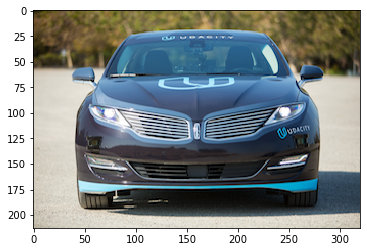

In [56]:
# Car Image
image_car = mpimg.imread('data/udacity_sdc.png')
plt.imshow(image_car)

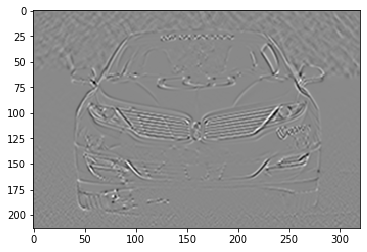

In [60]:
# Apply Sobel operator to car
filtered_image_car = cv2.cvtColor(image_car, cv2.COLOR_RGB2GRAY)
filtered_image_car = sobel(filtered_image_car, filters='xy')
plt.imshow(filtered_image_car, cmap='gray')